In [1]:
import pandas as pd
import numpy as np

data            = pd.read_csv("../../preproc/may_jump_encoded_bike.csv", header = None).to_numpy()
indep_test_data = pd.read_csv("../../preproc/june_jump_encoded_bike.csv", header = None).to_numpy()

read = 5

X = np.concatenate([data[:,11-read:11], data[:,-1-read:-1]], axis = 1)
Y = data[:,-1:]

X_it = np.concatenate([indep_test_data[:,11-read:11], indep_test_data[:,-1-read:-1]], axis = 1)
Y_it = indep_test_data[:,-1:]

In [2]:
from sklearn import tree

seed_value = 1789

np.random.seed(seed_value)

clf = tree.DecisionTreeClassifier(max_depth=40)
clf.fit(X,Y)
clf.get_depth()

39

In [3]:
pred_it = clf.predict(X_it)

test_it = Y_it.flatten()

pred_it.shape, test_it.shape

((382732,), (382732,))

In [4]:
def get_accuracy(tst, prd):
    if len(tst.shape) == 2:
        test = tst.flatten()
    elif len(tst.shape) == 1:
        test = tst
    if len(prd.shape) == 2:
        pred = prd.flatten()
    elif len(prd.shape) == 1:
        pred = prd
    return np.sum(pred == test) / test.size

get_accuracy(test_it, pred_it)

0.7208725687948747

In [5]:
s = tree.export_text(clf)
print(s)

|--- feature_4 <= -1.05
|   |--- feature_0 <= -1.75
|   |   |--- feature_4 <= -2.81
|   |   |   |--- feature_0 <= -3.86
|   |   |   |   |--- feature_4 <= -4.56
|   |   |   |   |   |--- feature_0 <= -5.26
|   |   |   |   |   |   |--- feature_4 <= -6.32
|   |   |   |   |   |   |   |--- feature_8 <= 1.75
|   |   |   |   |   |   |   |   |--- feature_0 <= -6.67
|   |   |   |   |   |   |   |   |   |--- feature_4 <= -7.37
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= -7.72
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 21
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  -7.72
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 20
|   |   |   |   |   |   |   |   |   |--- feature_4 >  -7.37
|   |   |   |   |   |   |   |   |   |   |--- feature_9 <= -3.75
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 20
|   |   |   |   |   |   |   |   |   |   |--- feature_9 >  -3.75
|   |   |   |   |   |   |   |  

In [6]:
from tqdm import tqdm
depths = np.arange(5, 100, 5)
actual_depths = np.empty(shape = depths.shape)
acc = np.empty(shape = depths.shape)

for i, d in tqdm(enumerate(depths)):
    clf = tree.DecisionTreeClassifier(max_depth=d)
    clf.fit(X,Y)
    pred_it = clf.predict(X_it)
    acc[i] = get_accuracy(Y_it, pred_it)
    actual_depths[i] = clf.get_depth()

19it [00:22,  1.19s/it]


Text(0, 0.5, 'Actual depth')

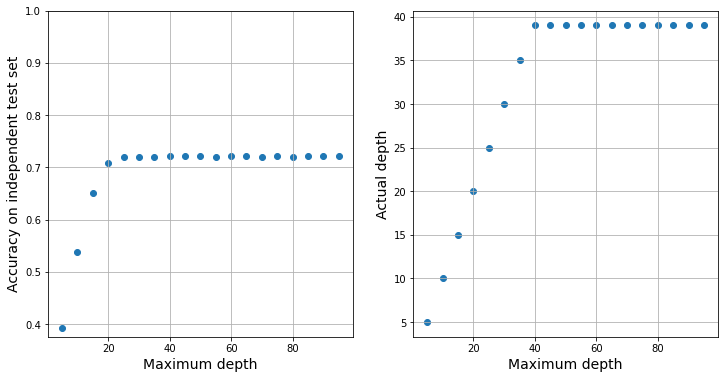

In [7]:
from matplotlib import pyplot as plt

f, a = plt.subplots(ncols = 2, figsize = (12,6))

a[0].scatter(depths, acc)
a[0].grid(True)
a[0].set_ylim( top = 1)
a[0].set_xlabel("Maximum depth", fontsize = 14)
a[0].set_ylabel("Accuracy on independent test set", fontsize = 14)

a[1].scatter(depths, actual_depths)
a[1].grid(True)
#a[1].set_ylim( top = 1)
a[1].set_xlabel("Maximum depth", fontsize = 14)
a[1].set_ylabel("Actual depth", fontsize = 14)

In [8]:
acc

array([0.39203411, 0.53772352, 0.65115799, 0.70750551, 0.71983529,
       0.72073932, 0.72070012, 0.72085167, 0.72082293, 0.7207968 ,
       0.72075499, 0.7209614 , 0.72087257, 0.72075238, 0.72076544,
       0.72074454, 0.72098753, 0.72083076, 0.7209196 ])